# Car Price Prediction

## **What's business question?

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


### 2. question

In [2]:
df=pd.read_csv("CarPrice.csv")

In [3]:
df.shape

(205, 26)

### 3. wrangle

>I have 205 instance(car) and each car has almost 25 features

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
for i,v in enumerate (df.columns):
    print(i,v)

0 car_ID
1 symboling
2 CarName
3 fueltype
4 aspiration
5 doornumber
6 carbody
7 drivewheel
8 enginelocation
9 wheelbase
10 carlength
11 carwidth
12 carheight
13 curbweight
14 enginetype
15 cylindernumber
16 enginesize
17 fuelsystem
18 boreratio
19 stroke
20 compressionratio
21 horsepower
22 peakrpm
23 citympg
24 highwaympg
25 price


#### DATA DICTONARY		

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
for col in df.columns:
    print(col,":",df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

car_ID : 205
1      1
142    1
132    1
133    1
134    1
Name: car_ID, dtype: int64

********************

symboling : 6
 0    67
 1    54
 2    32
 3    27
-1    22
Name: symboling, dtype: int64

********************

CarName : 147
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: CarName, dtype: int64

********************

fueltype : 2
gas       185
diesel     20
Name: fueltype, dtype: int64

********************

aspiration : 2
std      168
turbo     37
Name: aspiration, dtype: int64

********************

doornumber : 2
four    115
two      90
Name: doornumber, dtype: int64

********************

carbody : 5
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

********************

drivewheel : 3
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

********************

enginelocation : 2
front    202
rear       3
Name

## **Data Preperation

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

> Data doesn't contain Null values

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

> no duplicated data is found

### 4. cleaning data

In [10]:
#Make all strings in the same format 
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')
    df[col]=df[col].str.lower().str.replace('-','_')

## **Data Understanding

### 5. Explore

<AxesSubplot:xlabel='price', ylabel='Count'>

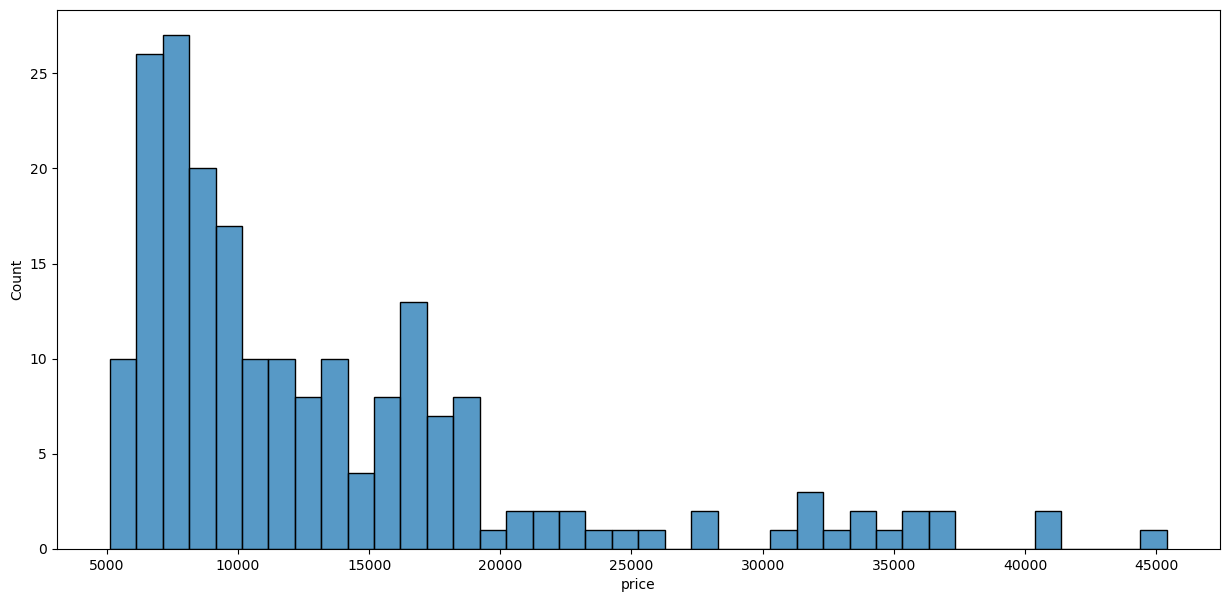

In [11]:
plt.figure(figsize=(15,7))
sns.histplot(df.price,bins=40)

> price of car is right skewed

In [12]:
df.price.skew()

1.7776781560914454

In [13]:
#check catogrical columns
string_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

>we need to handle catogrical data into numerical data

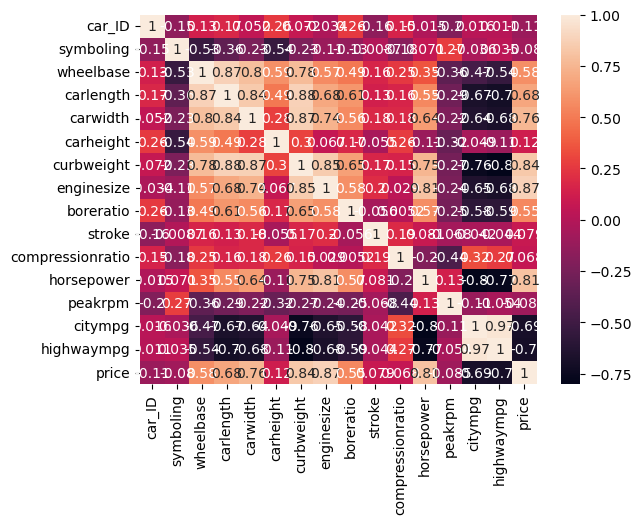

In [14]:
sns.heatmap(df.corr() , annot=True);

> From this map, there are some features which price depends on by large percent such as (wheelbase, curbweight, enginesize and horsepower) and gradually  less as (carlength ,boreratio and car width).

### 6. EDA

Some questions helps me to understand data and helps me in validation and evaluation steps

### what's the average price of  cars in dataset?

In [15]:
df.CarName.value_counts()

toyota_corona           6
toyota_corolla          6
peugeot_504             6
subaru_dl               4
mitsubishi_mirage_g4    3
                       ..
mazda_glc_4             1
mazda_rx2_coupe         1
maxda_glc_deluxe        1
maxda_rx3               1
volvo_246               1
Name: CarName, Length: 147, dtype: int64

In [16]:
df.groupby('CarName').mean()['price']

CarName
alfa_romero_giulia          13495.0
alfa_romero_quadrifoglio    16500.0
alfa_romero_stelvio         16500.0
audi_100_ls                 13950.0
audi_100ls                  17580.0
                             ...   
volvo_246                   22470.0
volvo_264gl                 20522.5
volvo_diesel                18950.0
vw_dasher                   11595.0
vw_rabbit                    9980.0
Name: price, Length: 147, dtype: float64

>* 1 alfa_romero_giulia has a greater price and its version also (quadrifoglio-stelvio)
> * 2 vm_rabbit has lower price in cars 


### compare the average price for cars which horse power greater /less 100 hp?

In [17]:
df[df['horsepower']<=100]['price'].mean()

8766.67256637168

In [18]:
df[df['horsepower']>=100]['price'].mean()

18632.251776595742

> the more horsepower a car produces, the better its acceleration, which is a strong factor in its overall performance. So, we
see that cars which have a horse power than 100 its price average increased (18632.25) and  its horse power less than 100 its price average almost (8766.67)

### relation between car weight and price ?
A car’s weight is an important factor in how much fuel it will consume. The heavier the vehicle, the more energy it needs to get moving. Light vehicles are getting lighter. So, there's an affect also on price.

In [19]:
df.groupby('curbweight')['price'].mean()

curbweight
1488     5151.00
1713     6479.00
1819     6855.00
1837     5399.00
1874     7605.75
          ...   
3750    28248.00
3770    31600.00
3900    40960.00
3950    36000.00
4066    33900.00
Name: price, Length: 171, dtype: float64

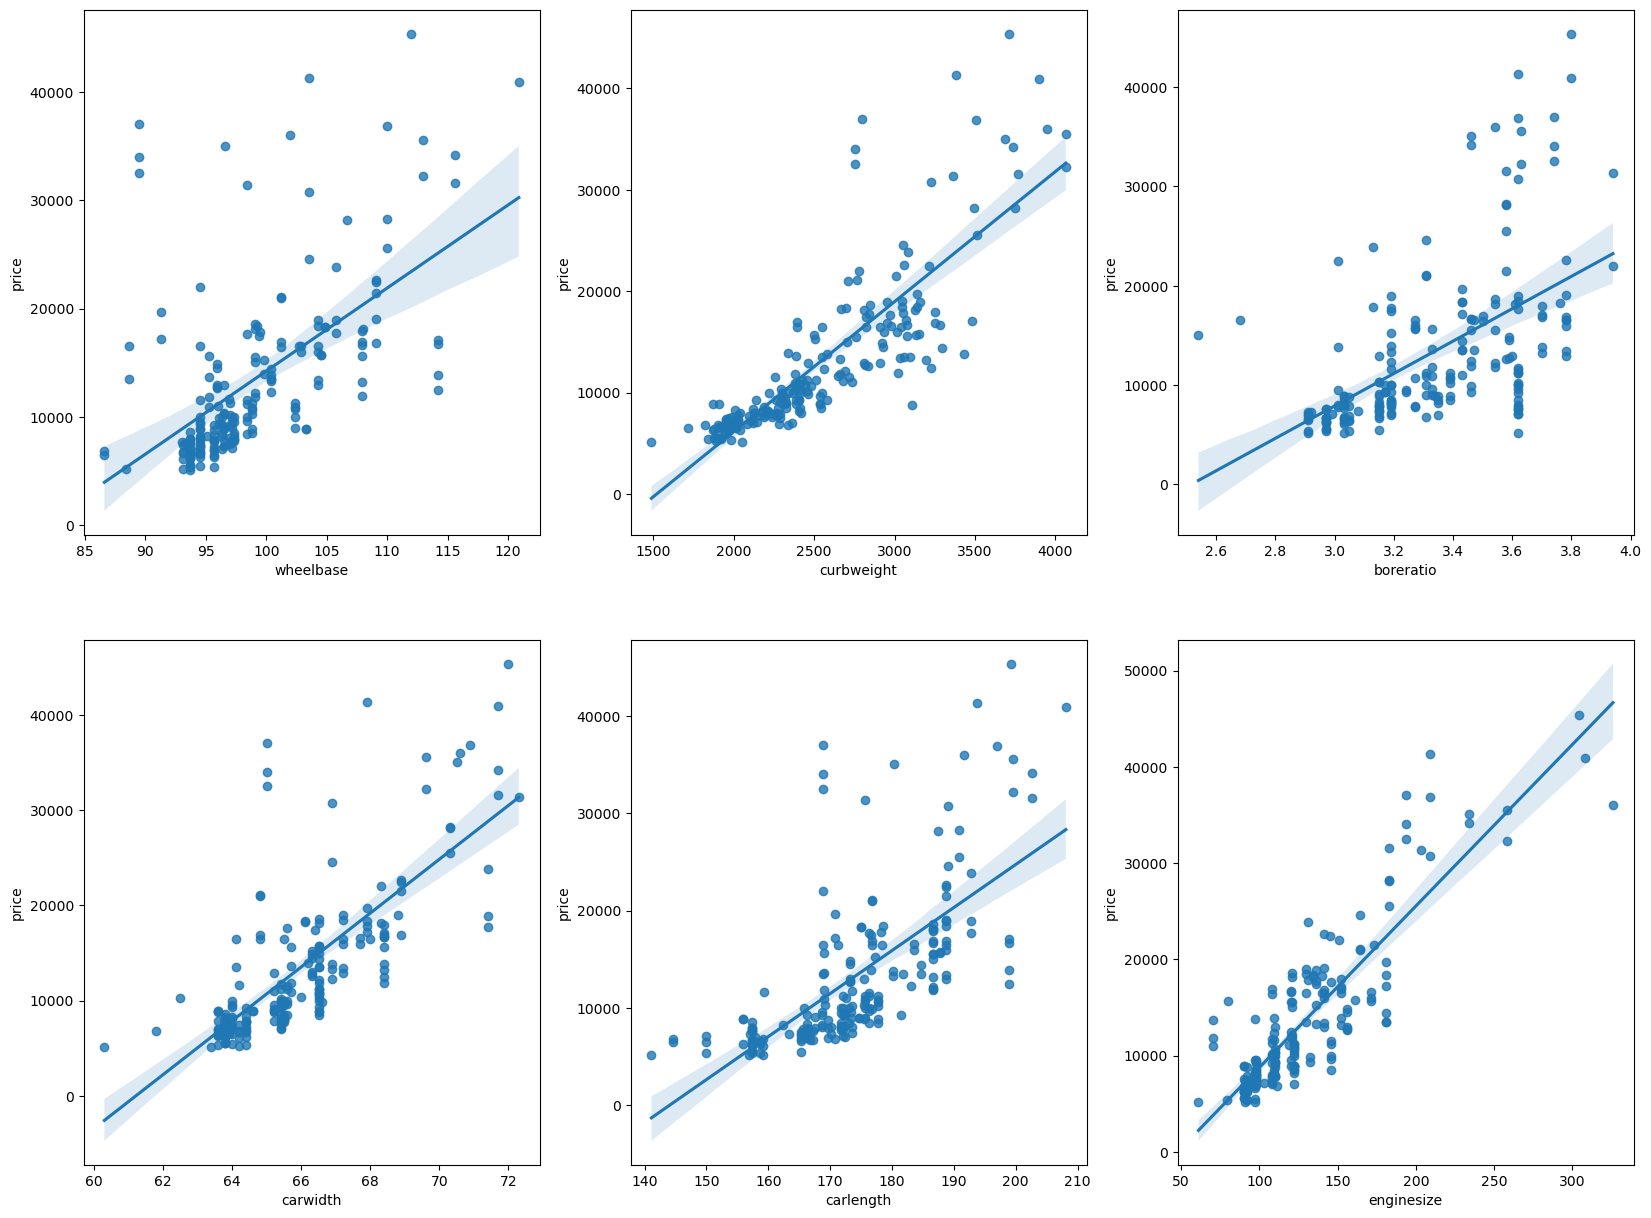

In [20]:
columns=['wheelbase','curbweight','boreratio','carwidth','carlength','enginesize']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'price', data = df)
plt.show()

### Insights:
> * There's some cars its wheel base make a differance and affect on price of this car.
> * The bigger the number of engine size, the more expensive the car usually is to buy.
> * there're some outliters values but almost by increasing boreratio the price is increasing
> * Bore ratio of car and the rate of feul consumption are factors affect on the performance of car and also price.
> * by increasinng car length and width values, price is increaing.
> * The heavier the vehicle, the more energy it needs to get moving. By increasing curbweight, the price of cars will be affect but not more because there are more outliters.

### Do catogrical data affect on price?

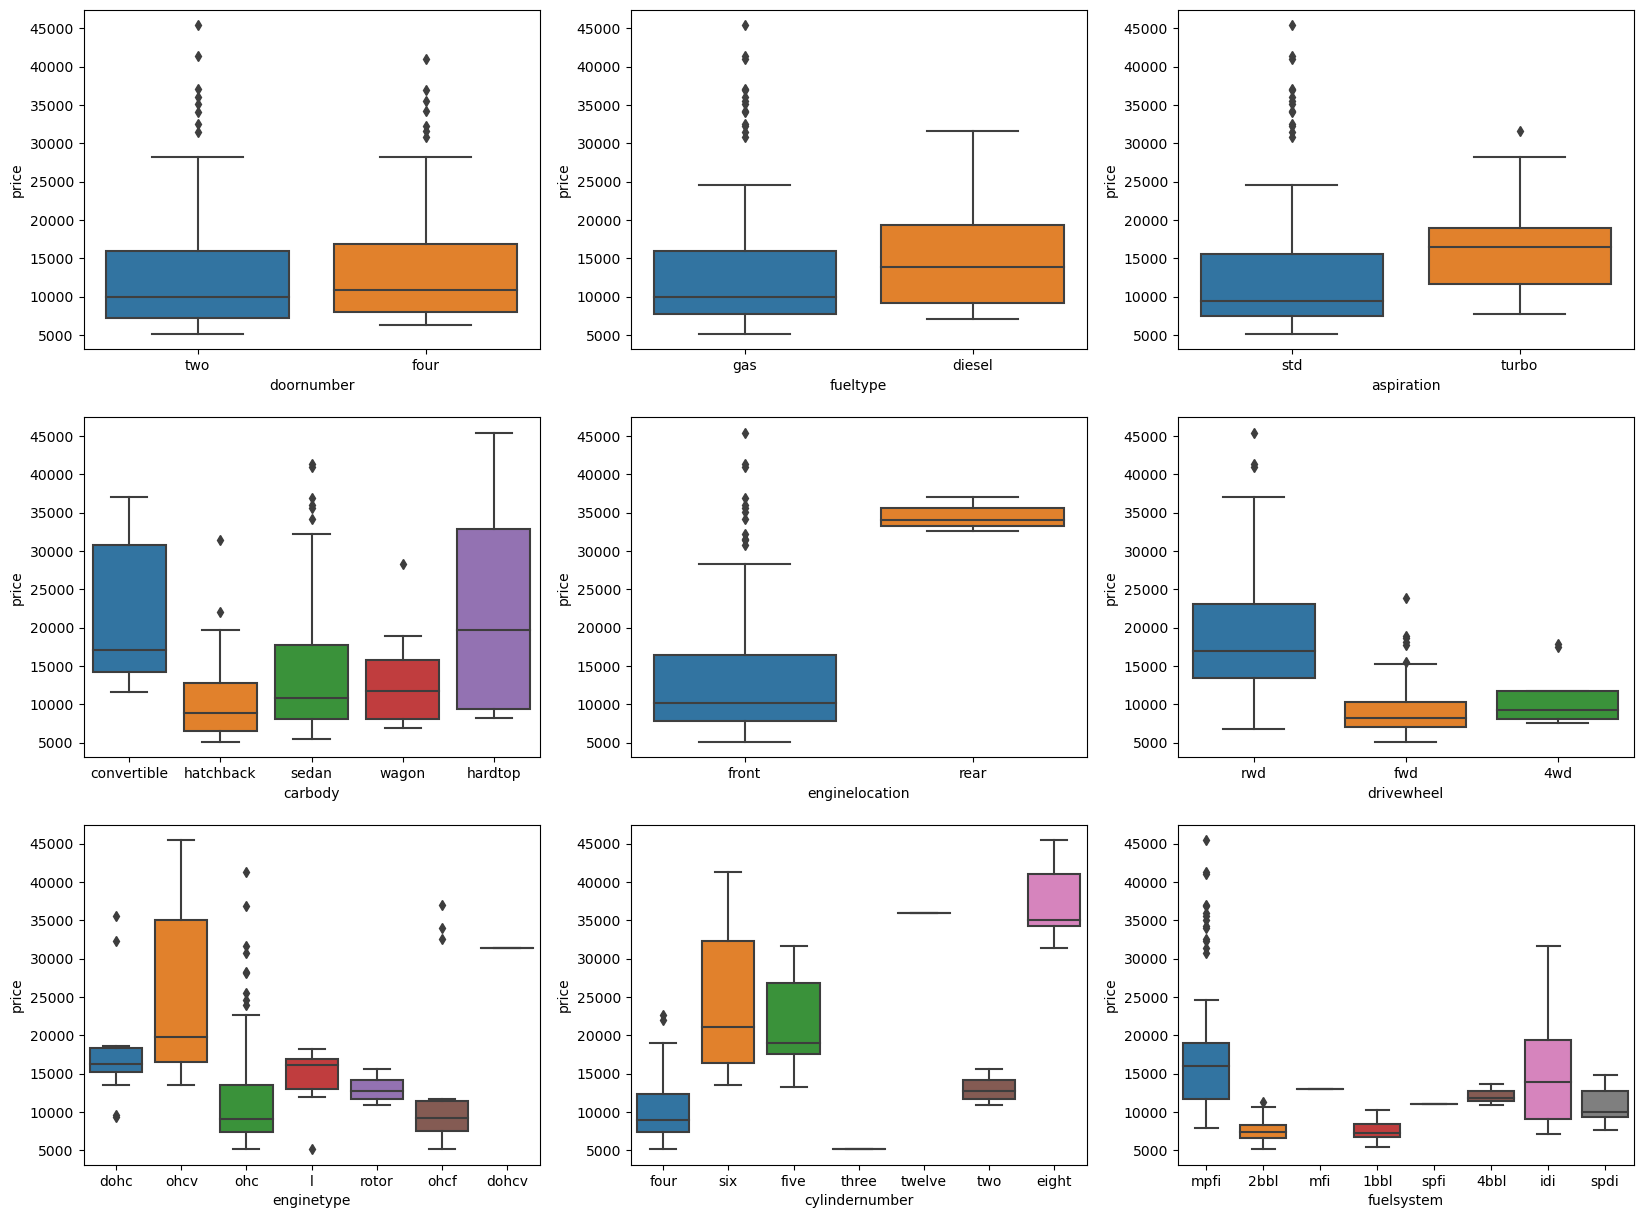

In [21]:
plt.figure(figsize=(20, 15))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = df)
plt.show()

### Insights:
> * door numbers doesn't affect more on price
> * cars with disel feul type has an expensive price  than gas ones
> * if carbody with hardtop or convertible thus gives high price
> * The cars with rear enginelocation are way expensive than cars with front enginelocation
> * Enginetype ohcv comes into higher price range cars
> * cars with cylinder number eight has the highst price ever


### Convert important category data into numerical one


In [22]:
fueltype_le=LabelEncoder()
df['fueltype']= fueltype_le.fit_transform(df.fueltype)
enginelocation_le=LabelEncoder()
df['enginelocation']=enginelocation_le.fit_transform(df.enginelocation)
cylindernumber_le=LabelEncoder()
df['cylindernumber']=cylindernumber_le.fit_transform(df.cylindernumber)
enginetype_le=LabelEncoder()
df['enginetype']=enginetype_le.fit_transform(df.enginetype)
carbody_le=LabelEncoder()
df['carbody']=carbody_le.fit_transform(df.carbody)
aspiration_le=LabelEncoder()
df['aspiration']=aspiration_le.fit_transform(df.aspiration)

In [23]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [24]:
Car=pd.DataFrame(df)
Car=Car.to_csv("Car2.csv",index=False)

## ** model used

### 8. build the model

In [44]:
# Splitting the dataset into the Training set and Test set
X=df.drop(["car_ID","CarName","doornumber","drivewheel","enginelocation","symboling",
           'compressionratio','peakrpm','citympg','highwaympg','carheight','stroke','price',"fuelsystem"],axis=1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,shuffle=True,random_state = 8)

In [45]:
#scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [46]:
X_train

array([[ 0.30265996, -0.42640143, -0.78037595, ..., -0.83037949,
        -1.03126731, -1.0233017 ],
       [ 0.30265996, -0.42640143,  0.44592911, ..., -0.47847946,
         0.58574174, -0.11339201],
       [ 0.30265996, -0.42640143,  0.44592911, ...,  0.24731436,
         1.5918807 ,  0.18991122],
       ...,
       [ 0.30265996,  2.34520788, -0.78037595, ...,  1.12706444,
         0.334207  ,  2.19637874],
       [ 0.30265996,  2.34520788, -0.78037595, ...,  0.57722064,
         0.90914355,  0.91317277],
       [ 0.30265996, -0.42640143,  1.67223417, ...,  0.24731436,
         1.5918807 ,  0.18991122]])

In [47]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (143, 12)
X_test shape: (62, 12)
y_train shape: (143,)
y_test shape: (62,)


In [48]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred= model.predict(X_test)
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

,test,pred
65,18280.0,18956.444729
141,7126.0,8873.139003
194,12940.0,19155.673343
204,22625.0,18769.354624
188,9995.0,12230.133458


## ** Evaluation

In [50]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 2628.6832419751445
 RMSE: 14715402.29509674


In [51]:
model.score(X_test,y_test)

0.6717059636048974

## **Conclusion

multiple linear regression is one an extremely useful algorithm for tracking the relationships of continuous variables.


Here we reach at the the end of this report which have involved :

    (1) Business quiestion
    (2) Importing
    (3) Data preperation 
    (4) Data understanding(EDA) 
    (5) used Model
    (6) Evaluate model

